# Week 3
## Data retrieval, preprocessing, and normalization for ML


## Basic Outline
  
* Where do data come from? Data retreival.
* Ideal datasets and data types
* Common wrangling needs and implementations

## Where did you get your data?



* Generated in-house (stored as CSVs, TSVs, SQL, proprietary, etc)

* Collaborators

* Public sources

## Scripting data retrieval improves reproducibility

In [43]:
# you may need to:
# !pip install requests

In [44]:
# Downloading a data file from a remote repository
import urllib
#THIS IS A WAY OF GETTING DATA FROM A URL

URL = "https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/protein_expression.BRCA-US.tsv.gz"
#THIS is the URL you want

FILENAME = "brca_protein_expression.tsv.gz"
#THIS is what we will call the URL from here on out

urllib.request.urlretrieve(URL, FILENAME)
#This tells the library urllib to request to RETRIEVE from the interwebz using urlretrieve function the desired URL (which we previosuly named URL), and give it a desired filename

('brca_protein_expression.tsv.gz', <http.client.HTTPMessage at 0x1a16b83550>)

* Scraping tools such as Mechanize and BeautifulSoup allow extraction of data from websites


In [45]:
import requests
# Retrieving data from a remote web service in JSON format that gets converted to a python structure:
def get_genome_sequence_ensembl(chromosome, start, end):
    """ API described here http://rest.ensembl.org/documentation/info/sequence_region"""
    url = 'https://rest.ensembl.org/sequence/region/human/{0}:{1}..{2}:1?content-type=application/json'.format(
        chromosome, start, end)
    r = requests.get(url, headers={"Content-Type": "application/json"}, timeout=10.000)
    if r.ok:
        return r.json()['seq']
#this ^ CREATES a function with 3 ARGUMENTS (chromosome, start, and end) 
#then insert URL and fill in the locations {0}, {1}, {2} that are passed here
#the REQUESTS library (imported above) has a GET function that passes the entire URL (which we defined) , then get outa JSON object (a request object) --> get it, then access seq attribute
#this will give a sequence of chromosome (the following specified locations)
print(get_genome_sequence_ensembl(7, 200000,200100))

TTCTTGACACTGATTGATCTGCCAAAAGGGGAAGAATGAGTCCAGCTAGAATCCAGGACTAACCAGCGGGTGAGCTTCAAGGAACAAAGGGCTTCCGCTGG



## Pandas covers most of the data retrieval needs

In [46]:
import pandas as pd
#often you're getting things with pandas, eg LOCALLY (from your comp), using the PANDA (pd) READ_CSV or READ_TABLE functions which read table or CSV into pd structure
# Let's read with pandas
# Note that we do not even need to unzip the file before opening!

brca_data = pd.read_csv(FILENAME, sep="\t")
#could also write as brca_data = pd.read_table(FILENAME, sep="\t")
#NOTE, the sep part of the above determines what you should use as the default SEPARATOR of data; default is commma but you can override it, eg here we are uising tabs

brca_data.head(1)
#head prints the HEADERS of your table
#since we put 1 in head, will only look at FIRST ROW. and it will be pandas data
#for mine, will prob need to update the days for spec things too

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


## Pandas can even retrieve from an SQL database directly

In [47]:
# you may need to 
# !pip install sqlalchemy
# !pip install pymysql

In [48]:
import sqlalchemy as sa
# Connect to UCSC genomic database
engine = sa.create_engine('mysql+pymysql://genome@genome-mysql.cse.ucsc.edu/hg38', poolclass=sa.pool.NullPool)
# select 3 SNPs from Chromosome Y
pd.read_sql("SELECT * FROM snp147Common WHERE chrom='chrY' LIMIT 3", engine)

ModuleNotFoundError: No module named 'pymysql'


## Pandas dataframes

* Dataframes are convenient containers for mixed data types

* Pandas is *incredibly useful* for data wrangling

* sklearn is happy to accept Pandas dataframes as input

* Pandas is built for exploratory analysis, visualization and stat tests / ML 

In [ ]:
brca_data.head()

In [49]:
brca_data.head(4)

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
1,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ARID1A,ARID1A,NaN,NaN,0.619539,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
2,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,mTOR_pS2448,FRAP1,NaN,NaN,-0.538637,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
3,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ASNS,ASNS,NaN,NaN,1.156044,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


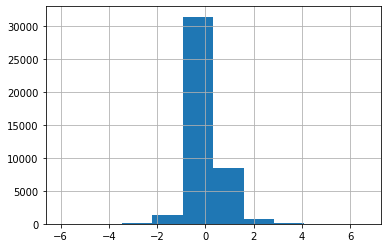

In [50]:
# Plotting boilerplate
import matplotlib.pyplot as plt
%matplotlib inline

brca_data['normalized_expression_level'].hist()

#accessing column BY NAME is square bracket notation, then visualizing w/ hist

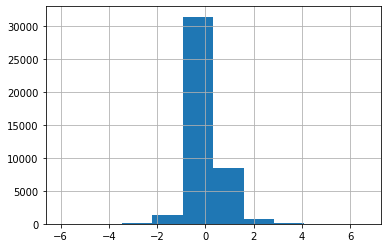

In [12]:
brca_data.normalized_expression_level.hist()
#alternate way of doing above

#accessing a column BY NAME in dot notation

In [10]:
%matplotlib inline

## Pre-processing a dataset: when are ready for ML?

* Ideally, data are organized as a table: examples-vs-features

* Data from multiple sources are combined

* Missing data are handled

* Features have been combined and manipulated as needed

* Any data that need to be normalized have been normalized

* Data are of the correct type (e.g. categorical vs continuous, boolean vs int)

## Let's have a look at Boston housing prices

In [52]:
boston = pd.read_table("https://biof509.github.io/spring2019/_downloads/776fb7b33137aa617c23025e1ac33b84/boston_data.csv", sep=",")
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice
0,1,65.0,Y,856,Normal,208500
1,2,80.0,Y,1262,Normal,181500
2,3,68.0,Y,920,Normal,223500
3,4,60.0,Y,961,Abnorml,140000
4,5,84.0,Y,1145,Normal,250000


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* Data from multiple sources are combined
* Missing data are handled
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

## Combining data from multiple sources

In [53]:
boston_second_floor = pd.read_table("https://biof509.github.io/spring2019/_downloads/776fb7b33137aa617c23025e1ac33b84/boston_data.csv", sep=",")
#passing a table from a URL 
#can either use .read_table (as above
boston_second_floor.head()
#boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice
0,1,65.0,Y,856,Normal,208500
1,2,80.0,Y,1262,Normal,181500
2,3,68.0,Y,920,Normal,223500
3,4,60.0,Y,961,Abnorml,140000
4,5,84.0,Y,1145,Normal,250000


In [54]:
boston_second_floor = pd.read_csv("https://biof509.github.io/spring2019/_downloads/776fb7b33137aa617c23025e1ac33b84/boston_data.csv", sep=",")
#passing a table from a URL 
#OR can use .read_csv

boston_second_floor.head()
#boston.head()


,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice
0,1,65.0,Y,856,Normal,208500
1,2,80.0,Y,1262,Normal,181500
2,3,68.0,Y,920,Normal,223500
3,4,60.0,Y,961,Abnorml,140000
4,5,84.0,Y,1145,Normal,250000


In [55]:
boston = pd.read_csv("boston_data.csv")
boston.head()
#reading in with LOCAL file, rather than the URL

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice
0,1,65.0,Y,856,Normal,208500
1,2,80.0,Y,1262,Normal,181500
2,3,68.0,Y,920,Normal,223500
3,4,60.0,Y,961,Abnorml,140000
4,5,84.0,Y,1145,Normal,250000


### Alternate way to get boston_second_floor info is to read it in locally

In [56]:
boston_second_floor = pd.read_csv("boston_second_floor.csv")

boston_second_floor.head()

,Id,2ndFlrSF
0,2,0
1,1,854
2,3,866
3,4,756
4,5,1053


## In the above variable boston

We have four "features" --> LotFrontage, CentralAir, 1stFlrSF, SaleCondition
We hae our "response" or "target vraiable" --> SalePrice

## Combining data from multiple sources

In [57]:
# Let's combine boston and boston second floor
boston = pd.merge(boston, boston_second_floor, on="Id")
#this MERGES two previously separate variables: boston, and boston_second_floor
#it MERGES them on the specified column, here "Id"
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
0,1,65.0,Y,856,Normal,208500,854
1,2,80.0,Y,1262,Normal,181500,0
2,3,68.0,Y,920,Normal,223500,866
3,4,60.0,Y,961,Abnorml,140000,756
4,5,84.0,Y,1145,Normal,250000,1053


In [58]:
# Let's add some additional data
boston3 = pd.read_csv("boston3.csv", sep=",")
boston3.head()

FileNotFoundError: [Errno 2] File b'boston3.csv' does not exist: b'boston3.csv'

## Thus far

In [59]:
boston.tail(10)

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
33,34,70.0,Y,1700,Normal,165500,0
34,35,60.0,Y,1561,Normal,277500,0
35,36,108.0,Y,1132,Normal,309000,1320
36,37,112.0,Y,1097,Normal,145000,0
37,38,74.0,Y,1297,Normal,153000,0
38,39,68.0,Y,1057,Abnorml,109000,0
39,40,65.0,N,1152,AdjLand,82000,0
40,41,84.0,Y,1324,Abnorml,160000,0
41,42,115.0,Y,1328,Normal,170000,0
42,43,NaN,Y,884,Normal,144000,0


In [60]:
boston.shape
#tells you the NUMBER of ROWS and COLUMNS in your dataset (rows,columns)

(43, 7)

In [61]:
boston.tail()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
38,39,68.0,Y,1057,Abnorml,109000,0
39,40,65.0,N,1152,AdjLand,82000,0
40,41,84.0,Y,1324,Abnorml,160000,0
41,42,115.0,Y,1328,Normal,170000,0
42,43,NaN,Y,884,Normal,144000,0


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* Missing data are handled
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

## Missing data
There are a number of ways to handle missing data:

* Drop all records with a value missing (simplest, but can lead to bias)
* Substitute all missing values with an approximated value (usually depends on data and algorithm)
* Add additional feature indicating when a value is missing

## Missing data

In [62]:
#boston.fillna()
#THIS FUNCTION IS SUPER POWERFUL
#it FILLS ALL MISSING values with the specified value

#EG

#if say boston.fillna(0); it will FILL ALL null values with 0
#for consistencies sake

In [63]:
boston.isna()
#the above gives you a BOOLEAN of all values which are not seen

boston.isna().sum()
#tells you how many missing values you have in each COLUMN

Id               0
LotFrontage      7
CentralAir       0
1stFlrSF         0
SaleCondition    0
SalePrice        0
2ndFlrSF         0
dtype: int64

In [64]:
boston.isna().sum().sum()
#sums up ALL missing values regardless of column

7

In [65]:
boston.info()
#gives info about dataset
#anywhere where n < 43, know you have some missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 7 columns):
Id               43 non-null int64
LotFrontage      36 non-null float64
CentralAir       43 non-null object
1stFlrSF         43 non-null int64
SaleCondition    43 non-null object
SalePrice        43 non-null int64
2ndFlrSF         43 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.7+ KB


In [66]:
# Drop all records with missing data
#boston.isnull().tail()
# boston.isnull().sum()
# boston.isnull().sum().sum()
#boston.tail()
#boston.dropna().tail()



#REMOVES all missing values

#boston..isnull.sum() does similar as above but is worse b/c we have a function called .fillna BUT not something called .fillnull

In [83]:
boston.dropna()
#Drops the ROWS (default) or COLUMNS (if specified) of any data containing missing values
#boston.dropna(axis=1); axis = 1 = columns
#boston.dropna(axis=0); axis = 0 = rows (and is default)

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
0,1,65.0,Y,856,Normal,208500,854
1,2,80.0,Y,1262,Normal,181500,0
2,3,68.0,Y,920,Normal,223500,866
3,4,60.0,Y,961,Abnorml,140000,756
4,5,84.0,Y,1145,Normal,250000,1053
5,6,85.0,Y,796,Normal,143000,566
6,7,75.0,Y,1694,Normal,307000,0
8,9,51.0,Y,1022,Abnorml,129900,752
9,10,50.0,Y,1077,Normal,118000,0
10,11,70.0,Y,1040,Normal,129500,0


In [68]:
boston.isna().sum()

Id               0
LotFrontage      7
CentralAir       0
1stFlrSF         0
SaleCondition    0
SalePrice        0
2ndFlrSF         0
dtype: int64

In [69]:
# Substitute missing values
# boston.fillna("Value!").tail()
boston.fillna({"2ndFlrSF": "Value1!", "LotFrontage": "Value2!"}).tail()
#if no missing values, .fillna will just ignore it

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
38,39,68,Y,1057,Abnorml,109000,0
39,40,65,N,1152,AdjLand,82000,0
40,41,84,Y,1324,Abnorml,160000,0
41,42,115,Y,1328,Normal,170000,0
42,43,Value2!,Y,884,Normal,144000,0


In [70]:
boston.fillna({"2ndFlrSF": "Value1!", "LotFrontage": "Value2!"}).tail().dtypes
#.DTYPES tells you what kind of input your value is
#you prob want it to be int or float --> ie numeric; not string

Id                int64
LotFrontage      object
CentralAir       object
1stFlrSF          int64
SaleCondition    object
SalePrice         int64
2ndFlrSF          int64
dtype: object

In [95]:
print(boston.mean())

print(boston.median())


Id                 22.000000
LotFrontage        74.055556
1stFlrSF         1173.860465
SalePrice      178170.930233
2ndFlrSF          236.697674
dtype: float64
Id                 22.0
LotFrontage        70.0
1stFlrSF         1132.0
SalePrice      154000.0
2ndFlrSF            0.0
dtype: float64


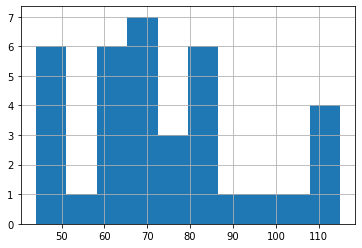

In [78]:
boston['LotFrontage'].hist()
#alt way of doing boston.LotFrontage.hist()
#sometimes good to map data to make sure it makes sense

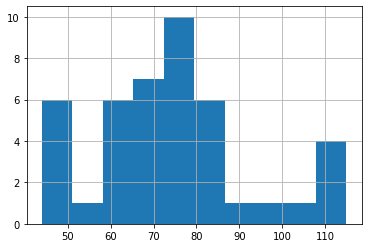

In [84]:
#if want to FILL MISSING VALUES before plotting
#this will FILL MISSING VALUES of boston.LotFrontgage (.fillna) with the MEAN of boston.LotFrontage, then plot on histo
boston.LotFrontage.fillna(boston.LotFrontage.mean()).hist()

# This is known as MEAN imputation
## Can also do the same with MEDIAN imputation

In [86]:
boston.loc[boston.LotFrontage.isna()]
#this will SHOW YOU all the null values in the dataset boston, specifically where the COLUMN "LotFrontage" is null

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
7,8,NaN,Y,1107,Normal,200000,983
12,13,NaN,Y,912,Normal,144000,0
14,15,NaN,Y,1253,Normal,157000,0
16,17,NaN,Y,1004,Normal,149000,0
24,25,NaN,Y,1060,Normal,154000,0
31,32,NaN,Y,1228,Normal,149350,0
42,43,NaN,Y,884,Normal,144000,0


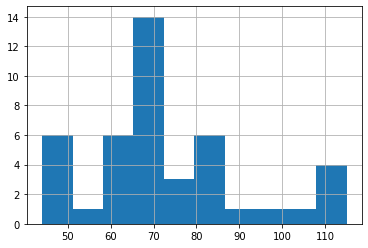

In [82]:
boston.LotFrontage.fillna(boston.LotFrontage.median()).hist()

In [88]:
boston.loc[~boston.LotFrontage.isna()]
#the SQUIGGLE ~ tells it NOT --> ie where boston.LotFrontage is NOT na (all values where it has something other than null)

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
0,1,65.0,Y,856,Normal,208500,854
1,2,80.0,Y,1262,Normal,181500,0
2,3,68.0,Y,920,Normal,223500,866
3,4,60.0,Y,961,Abnorml,140000,756
4,5,84.0,Y,1145,Normal,250000,1053
5,6,85.0,Y,796,Normal,143000,566
6,7,75.0,Y,1694,Normal,307000,0
8,9,51.0,Y,1022,Abnorml,129900,752
9,10,50.0,Y,1077,Normal,118000,0
10,11,70.0,Y,1040,Normal,129500,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19bd17d0>,
      dtype=object)

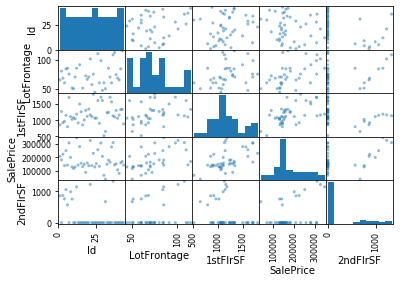

In [89]:
from pandas.plotting import scatter_matrix
scatter_matrix(boston)

# Notes for scatter plots
## if features correlate with TARGET, this is GOOD; probably predictive
## if featuers correlate with EACH OTHER; that's bad, should prob drop

In [94]:
boston.corr()

,Id,LotFrontage,1stFlrSF,SalePrice,2ndFlrSF
Id,1.000000,0.224077,0.171229,-0.174639,-0.386726
LotFrontage,0.224077,1.000000,0.325814,0.524534,0.168788
1stFlrSF,0.171229,0.325814,1.000000,0.548817,-0.290534
SalePrice,-0.174639,0.524534,0.548817,1.000000,0.409321
2ndFlrSF,-0.386726,0.168788,-0.290534,0.409321,1.000000


# Notes for correlation
## Want things that correlate well, but if they correlate too well with eachother becomes problematic
### May end up (say if correlation w eachother >.8) introducing at best similar info into model
### At worst, may cause tem to FAIL TO CONVERGE in order to minimize data
#### (this is like a linear regression model). Diff from what you will be doing for nonparametric things (decision tree or yes/no - not something you can describe in linear equation)

### Can run a PCA analysis beforehand if v worried about multiple things correlating to reduce dimensions and getting rid of correlated features

In [93]:
#IF value was CATEGROCIAL, you'd probabl want to use the MODE
boston.LotFrontage.mode()
#eg look @ number of days it rains; if it rains almost every day guess that it will rain the missing day [ie guess the most frequent]

0    60.0
dtype: float64

In [96]:
# Substitute missing values with mean
print(boston.mean())
boston.fillna(boston.mean()).tail()

# THIS DOES NOT change the actual data
#This only SHOWS WHAT IT IS!!!


#print(boston.median())
#boston.fillna(boston.median()).tail()

Id                 22.000000
LotFrontage        74.055556
1stFlrSF         1173.860465
SalePrice      178170.930233
2ndFlrSF          236.697674
dtype: float64


,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
38,39,68.000000,Y,1057,Abnorml,109000,0
39,40,65.000000,N,1152,AdjLand,82000,0
40,41,84.000000,Y,1324,Abnorml,160000,0
41,42,115.000000,Y,1328,Normal,170000,0
42,43,74.055556,Y,884,Normal,144000,0


In [98]:
# Add column indicating missing values
boston["2ndFlrSF"].isnull()
#boston["missing_second_floor"] = boston["2ndFlrSF"].isnull()
# boston.tail()
boston = boston.fillna(boston.mean())
#BECAUSE you REDIFINED BOSTON, you have NOW CHANGED THE DATASET to include the missing value filled in
#THIS ACTUALY MODS IT
boston.tail()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
38,39,68.000000,Y,1057,Abnorml,109000,0
39,40,65.000000,N,1152,AdjLand,82000,0
40,41,84.000000,Y,1324,Abnorml,160000,0
41,42,115.000000,Y,1328,Normal,170000,0
42,43,74.055556,Y,884,Normal,144000,0


In [24]:
# You may need to upgrade Scikit-learn (and restart Jupyter kernel afterwards) to use Imputer
# !pip install scikit-learn --upgrade

In [100]:
# Imputation is a general technique for "guessing" appropriate missing values
# It could be implemented as a complex ML regression algorithm or a simple 'take an average' strategy.
from sklearn.impute import SimpleImputer

In [104]:
imputer = SimpleImputer(strategy='mean')
#this IMPUTES missing values
#gives them what you define STRATEGY as (eg mean, median, "most common = mode")
imputer.fit_transform(boston[["LotFrontage"]])
#now we run it on the boston dataset, under the column "LotFrontage"
#and it will do it then return an array

array([[ 65.        ],
       [ 80.        ],
       [ 68.        ],
       [ 60.        ],
       [ 84.        ],
       [ 85.        ],
       [ 75.        ],
       [ 74.05555556],
       [ 51.        ],
       [ 50.        ],
       [ 70.        ],
       [ 85.        ],
       [ 74.05555556],
       [ 91.        ],
       [ 74.05555556],
       [ 51.        ],
       [ 74.05555556],
       [ 72.        ],
       [ 66.        ],
       [ 70.        ],
       [101.        ],
       [ 57.        ],
       [ 75.        ],
       [ 44.        ],
       [ 74.05555556],
       [110.        ],
       [ 60.        ],
       [ 98.        ],
       [ 47.        ],
       [ 60.        ],
       [ 50.        ],
       [ 74.05555556],
       [ 85.        ],
       [ 70.        ],
       [ 60.        ],
       [108.        ],
       [112.        ],
       [ 74.        ],
       [ 68.        ],
       [ 65.        ],
       [ 84.        ],
       [115.        ],
       [ 74.05555556]])

In [105]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(boston[["LotFrontage"]])

array([[ 65.        ],
       [ 80.        ],
       [ 68.        ],
       [ 60.        ],
       [ 84.        ],
       [ 85.        ],
       [ 75.        ],
       [ 74.05555556],
       [ 51.        ],
       [ 50.        ],
       [ 70.        ],
       [ 85.        ],
       [ 74.05555556],
       [ 91.        ],
       [ 74.05555556],
       [ 51.        ],
       [ 74.05555556],
       [ 72.        ],
       [ 66.        ],
       [ 70.        ],
       [101.        ],
       [ 57.        ],
       [ 75.        ],
       [ 44.        ],
       [ 74.05555556],
       [110.        ],
       [ 60.        ],
       [ 98.        ],
       [ 47.        ],
       [ 60.        ],
       [ 50.        ],
       [ 74.05555556],
       [ 85.        ],
       [ 70.        ],
       [ 60.        ],
       [108.        ],
       [112.        ],
       [ 74.        ],
       [ 68.        ],
       [ 65.        ],
       [ 84.        ],
       [115.        ],
       [ 74.05555556]])

## How to decide how to treat missing data?
* Very data-dependent!
* Decisions need to be justified and DOCUMENTED
* Implement missing data preprocessing in a reproducible way (python script)
### * Don't create data from nothing
* Iris example

## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

In [30]:
# boston.head()
boston["total_sf"] = boston["1stFlrSF"] + boston["2ndFlrSF"]
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF,total_sf
0,1,65.0,Y,856,Normal,208500,854,1710
1,2,80.0,Y,1262,Normal,181500,0,1262
2,3,68.0,Y,920,Normal,223500,866,1786
3,4,60.0,Y,961,Abnorml,140000,756,1717
4,5,84.0,Y,1145,Normal,250000,1053,2198


In [31]:
boston.head()
boston = boston.replace({"Abnorml": "abnormal", "Normal": "normal"})
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF,total_sf
0,1,65.0,Y,856,normal,208500,854,1710
1,2,80.0,Y,1262,normal,181500,0,1262
2,3,68.0,Y,920,normal,223500,866,1786
3,4,60.0,Y,961,abnormal,140000,756,1717
4,5,84.0,Y,1145,normal,250000,1053,2198


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

## Normalization
* What is it?
* Why do it? (data sources, feature distributions)
* Types?

### Normalization

Many machine learning algorithms expect features to have similar distributions and scales.

A classic example is gradient descent, if features are on different scales some weights will update faster than others because the feature values scale the weight updates.

There are two common approaches to normalization:

* Z-score standardization
* Min-max scaling

#### Z-score standardization

Z-score standardization rescales values so that they have a mean of zero and a standard deviation of 1. Specifically we perform the following transformation:

$$z = \frac{x - \mu}{\sigma}$$

#### Min-max scaling

An alternative is min-max scaling that transforms data into the range of 0 to 1. Specifically:

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

Min-max scaling is less commonly used but can be useful for image data and in some neural networks.

In [32]:
# a = (boston['1stFlrSF'] - boston['1stFlrSF'].mean()) / boston['1stFlrSF'].std()
# boston['1stFlrSF'].hist()
# boston.head()
## boston.total_sf.hist()
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler

scaler = StandardScaler()
print(scaler.fit_transform(boston[['1stFlrSF']]))
#scaled_size = pd.Series(scale(boston.total_sf))
#scaled_size.hist()
#scaled_size.mean()
#scaled_size.std(ddof=0)
#boston["normalized_total_sf"] = scaled_size

[[-1.11717197]
 [ 0.30978064]
 [-0.89223363]
 [-0.7481325 ]
 [-0.10143477]
 [-1.32805167]
 [ 1.82811445]
 [-0.23499191]
 [-0.53373814]
 [-0.34043176]
 [-0.47047424]
 [ 0.02860771]
 [-0.92035092]
 [ 1.12518213]
 [ 0.27814868]
 [-1.12420129]
 [-0.59700205]
 [ 0.42927913]
 [-0.21038928]
 [ 0.58040958]
 [-0.05574417]
 [-0.23147725]
 [ 2.18309527]
 [-0.400181  ]
 [-0.400181  ]
 [ 1.49773626]
 [-0.96252686]
 [ 1.86326106]
 [ 1.49773626]
 [-2.29809827]
 [-1.84470692]
 [ 0.19028214]
 [ 0.21137011]
 [ 1.84920242]
 [ 1.36066446]
 [-0.14712537]
 [-0.27013853]
 [ 0.43279379]
 [-0.41072499]
 [-0.07683214]
 [ 0.52768966]
 [ 0.5417483 ]
 [-1.01876145]]


/Users/agoncear/anaconda/envs/jupyter/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/agoncear/anaconda/envs/jupyter/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
scaler = MinMaxScaler()
print(scaler.fit_transform(boston[['1stFlrSF']]))

[[0.26352941]
 [0.58196078]
 [0.31372549]
 [0.34588235]
 [0.49019608]
 [0.21647059]
 [0.92078431]
 [0.46039216]
 [0.39372549]
 [0.43686275]
 [0.40784314]
 [0.51921569]
 [0.30745098]
 [0.76392157]
 [0.57490196]
 [0.26196078]
 [0.37960784]
 [0.60862745]
 [0.46588235]
 [0.64235294]
 [0.50039216]
 [0.46117647]
 [1.        ]
 [0.42352941]
 [0.42352941]
 [0.84705882]
 [0.29803922]
 [0.92862745]
 [0.84705882]
 [0.        ]
 [0.10117647]
 [0.55529412]
 [0.56      ]
 [0.9254902 ]
 [0.81647059]
 [0.48      ]
 [0.45254902]
 [0.60941176]
 [0.42117647]
 [0.49568627]
 [0.63058824]
 [0.63372549]
 [0.2854902 ]]


/Users/agoncear/anaconda/envs/jupyter/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Other preprocessing / normalization techniques and thoughts
* http://scikit-learn.org/stable/modules/preprocessing.html
* http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html

## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* ~~Any data that need to be normalized have been normalized~~
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

In [34]:
#boston.head()
import numpy as np

# boston["1stFlrSF"].mean(skipna=False)
boston["CentralAir_bool"] = boston["CentralAir"] == "Y"
# boston.head()
# boston["SaleCondition"].dtype
#boston["SaleCondition"].head()
boston["SaleCondition"].astype("category").dtype
#boston["SaleCondition"] = boston["SaleCondition"].astype("category")
#boston["SaleCondition"].dtype

CategoricalDtype(categories=['AdjLand', 'Partial', 'abnormal', 'normal'], ordered=False)

In [35]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

lb = LabelBinarizer()
lb.fit_transform(['yes', 'yes', 'no', 'no'])          

array([[1],
       [1],
       [0],
       [0]])

In [36]:
lb.fit_transform(['yes', 'yes', 'no', 'no', 'maybe'])

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [37]:
ohe = OneHotEncoder()
sparse_matrix = ohe.fit_transform(boston[['SaleCondition', 'CentralAir_bool']])
sparse_matrix.todense()

matrix([[0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0

### Another example of categorical data conversion to boolean features

In [38]:
x = pd.DataFrame([[0,1,2,3,4,5,6],
                  [2,np.nan,7,4,9,1,3],
                  [0.1,0.12,0.11,0.15,0.16,0.11,0.14],
                  [100,120,np.nan,127,130,121,124],
                  ['Green','Red','Blue','Blue','Green','Red','Green']], ).T
x.columns = ['A', 'B', 'C', 'D', 'E']
x

,A,B,C,D,E
0,0,2,0.1,100,Green
1,1,NaN,0.12,120,Red
2,2,7,0.11,NaN,Blue
3,3,4,0.15,127,Blue
4,4,9,0.16,130,Green
5,5,1,0.11,121,Red
6,6,3,0.14,124,Green


In [39]:
x_cat = x.copy()
for val in x['E'].unique():
    x_cat['E_{0}'.format(val)] = x_cat['E'] == val
x_cat

,A,B,C,D,E,E_Green,E_Red,E_Blue
0,0,2,0.1,100,Green,True,False,False
1,1,NaN,0.12,120,Red,False,True,False
2,2,7,0.11,NaN,Blue,False,False,True
3,3,4,0.15,127,Blue,False,False,True
4,4,9,0.16,130,Green,True,False,False
5,5,1,0.11,121,Red,False,True,False
6,6,3,0.14,124,Green,True,False,False


In [40]:
# Another option to have one feature per color is to use Pivot
# Note that it will create missing data:
x.pivot(index='A', columns='E', values='C')

E,Blue,Green,Red
A,,,
0,NaN,0.1,NaN
1,NaN,NaN,0.12
2,0.11,NaN,NaN
3,0.15,NaN,NaN
4,NaN,0.16,NaN
5,NaN,NaN,0.11
6,NaN,0.14,NaN


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* ~~Any data that need to be normalized have been normalized~~
* ~~Data are of correct type (e.g. categorical vs continuous, boolean vs int)~~

## Other types of data storage
* Image
* Text

### Image

Datasets with images also need to follow samples-by-features format.
Features in this case are pixels and their intensities. For black and white images intensities are binary. For grayscale they could be integer or floating point numbers. Color images are usually represented as multiple images - one for each color channel (e.g. red / green / blue).

Thus each image is represented as a one dimensional array, which is exactly what's needed for ML applications. To visualize it, however, we need to change its shape.

In [41]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()     
print("Dimensionality samples x features", dataset.data.shape)

# first image - pixel intensities
dataset.data[0]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/agoncear/scikit_learn_data
Dimensionality samples x features (400, 4096)


array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

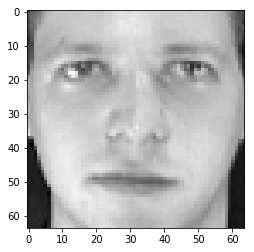

In [42]:
# reshaping to visualize
plt.imshow(dataset.data[0].reshape(64, 64), cmap=plt.cm.gray)

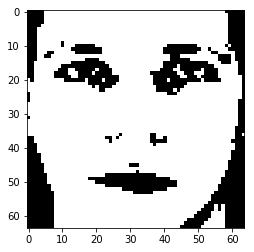

In [43]:
# Example of normalization of an image
from sklearn.preprocessing import Binarizer

image = dataset.data[0].reshape(64, 64)
normalized_image = Binarizer(threshold=0.6).fit_transform(image)
plt.imshow(normalized_image, cmap=plt.cm.gray)

### Text

Text has also to be transformed to samples-by-features format.
In the simplest case each document is a sample and ocurrence of words are its features.

In [44]:
from sklearn.datasets import fetch_20newsgroups
emails = fetch_20newsgroups(subset='train', categories=['sci.med'], shuffle=True, random_state=0)
print("Number of documents", len(emails.data))
print("Beginning of the first document", emails.data[0][:500])

Number of documents 594
Beginning of the first document From: ron.roth@rose.com (ron roth)
Subject: HYPOGLYCEMIA
X-Gated-By: Usenet <==> RoseMail Gateway (v1.70)
Organization: Rose Media Inc, Toronto, Ontario.
Lines: 31

     anello@adcs00.fnal.gov (Anthony Anello) writes:

A(>  Can anyone tell me if a bloodcount of 40 when diagnosed as hypoglycemic is
A(>  dangerous, i.e. indicates a possible pancreatic problem?  One Dr. says no, the
A(>  other (not his specialty) says the first is negligent and that another blood
A(>  test should be done.  Also, wh


In [45]:
# For every document we count word ocurrence:

from sklearn.feature_extraction.text import CountVectorizer
emails_in_ML_format = CountVectorizer().fit_transform(emails.data)
print(emails_in_ML_format.shape)

(594, 16257)


In [46]:
# Now this is how the first document looks like:
emails_in_ML_format[0].todense()

matrix([[1, 0, 0, ..., 0, 0, 0]])